In [20]:
%matplotlib inline
import pandas
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [21]:
instructors = pandas.read_csv('2019courses.csv')

In [41]:
# Build a dictionary of instructors -> courses they teach
teaching_dict = {}
course_idx = {}
course_list = []

# Iterate through every offered course
for idx, course in instructors.iterrows():
    course_code = course['Course #']
    if course_code not in course_list: # Accounts for courses with multiple sections 
        course_idx[course_code] = idx
        course_list.append(course_code)
        profs = course['Instructor'].split(';')
        for prof in profs:
            if prof != 'et al': # Ensure it's actually a professor
                if prof not in teaching_dict:
                    teaching_dict[prof] = [course_code]
                else:
                    teaching_dict[prof].append(course_code)
                    
# The adjacency matrix, with courses as vertices and edges indicating two classes taught by the same professor
conflicts = np.zeros((len(course_list), len(course_list)))    

# For each professor, if they teach multiple courses, mark those points in the adjacency matrix
for prof in teaching_dict:
    if len(teaching_dict[prof]) > 1:
        classes_taught = teaching_dict[prof]
        # Get each unique pair of (different) courses taught
        for i in range(len(classes_taught)):
            for j in range (i+1, len(classes_taught)):
                class1 = classes_taught[i]
                class2 = classes_taught[j]
                
                conflicts[course_idx[class1]][course_idx[class2]] = 1
                conflicts[course_idx[class2]][course_idx[class1]] = 1
        

49
{' Stein, Lynn': ['ENGR4190', 'ENGR2510'], 'Stolk, Jon': ['SCI1410'], ' Wynstra, Beth (Babson)': ['AHSE2155'], 'Lynch, Caitrin': ['AHSE1515'], 'Bowen, Jim': ['AHSE2515', 'AHSE2515A', 'AHSE3515'], ' Ben-Ur, Ela': ['ENGR2250'], 'Minch, Brad': ['ENGR2420', 'ENGR3430'], ' Sarang-Sieminski, Alisha': ['ENGR4190'], 'Govindasamy, Siddhartan': ['ENGR3420', 'ENGR3440'], 'Huang, Jean': ['SCI1230'], 'Nugent, Carrie': ['MTH2188A / SCI2199A'], ' et al': ['ENGR4290', 'ENGR3290'], 'Zastavker, Yevgeniya': ['SCI1130'], 'Storey, Brian': ['ENGR2320'], 'Donis-Keller, Helen': ['AHSE2160 / SCI1260'], 'Harris, Scott': ['ENGR4599'], 'Adler, Jon': ['AHSE2155', 'ENGR2250'], ' Staff': ['AHSE1515', 'CIE2019A'], 'Wood, Alison': ['SUST3301'], 'Ben-Ur, Ela': ['AHSE2141 / ENGR2141'], ' Bloomer, S': ['ENGR2250'], 'Sarang-Sieminski, Alisha': ['ENGR3600'], 'Linder, Ben': ['ENGR3210'], ' Tow, Emily': ['CIE2019A'], 'Dusek, Jeff': ['CIE2019A'], 'Martello, Rob': ['AHSE2199'], '\nMichalka, Sam': ['ENGR4190'], 'Vanasupa, Li

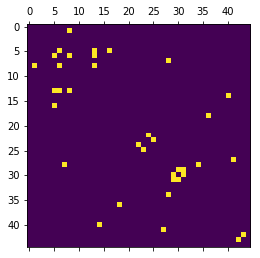

In [42]:
plt.matshow(conflicts)
plt.show()

['ENGR3599', 'AHSE2515', 'SCI1410', 'SCI1399', 'AHSE2199A', 'ENGR3430', 'ENGR3290', 'ENGR3600', 'ENGR3440', 'MTH3120', 'ENGR2350', 'ENGR2410', 'AHSE4190', 'ENGR2199A', 'ENGR2250', 'MTH2210', 'AHSE2199', 'ENGR3299', 'ENGR3210', 'SUST3301', 'ENGR2320', 'ENGR3252', 'ENGR4190', 'ENGR2420', 'ENGR2330', 'ENGR3345', 'ENGR4599', 'SCI1130', 'MTH2188A / SCI2199A', 'ENGR2510', 'AHSE3515', 'AHSE0112', 'ENGR4290', 'ENGR3420', 'ENGR3525', 'AHSE2160 / SCI1260', 'AHSE2141 / ENGR2141', 'AHSE2155', 'AHSE1515', 'ENGR3392', 'CIE2019A', 'SCI1230', 'AHSE2515A', 'ENGR3531 / MTH2131', 'ENGR1330']


/usr/local/lib/python3.4/dist-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.4/dist-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.4/dist-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


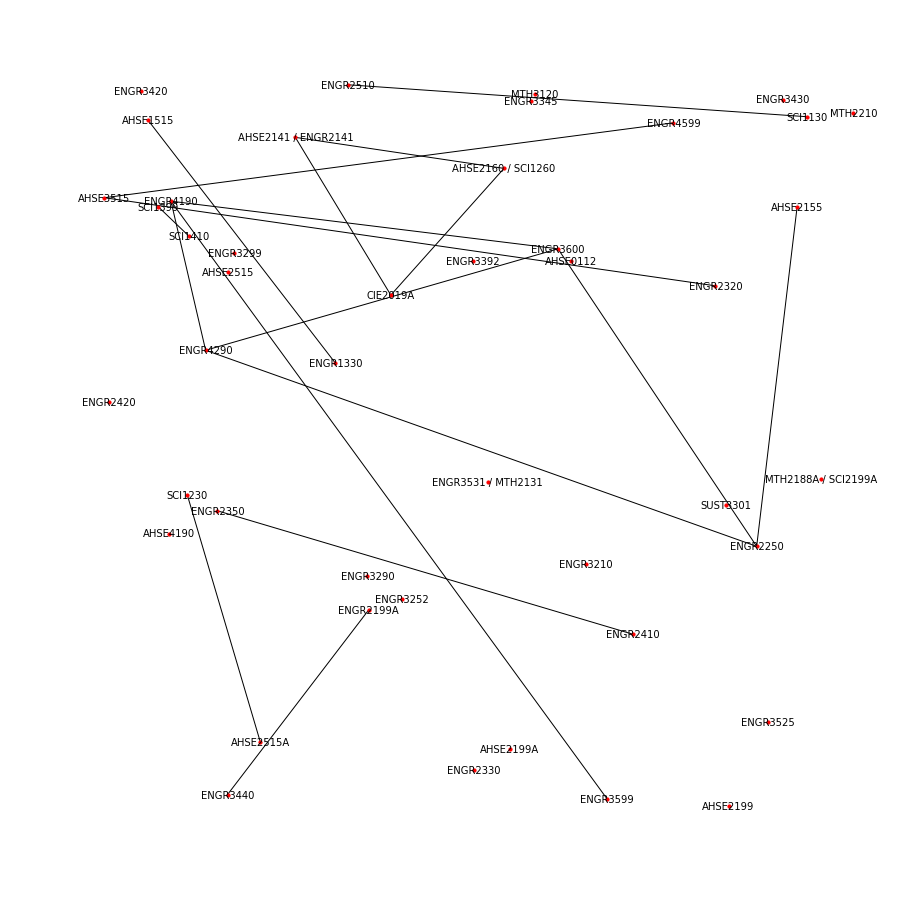

In [44]:
G = nx.from_numpy_matrix(conflicts)
mapping = {}
for idx, course in enumerate(course_list):
    mapping[idx] = course
# Label nodes from nu
G=nx.relabel_nodes(G,mapping)
print(G.nodes())
plt.figure(1,figsize=(12,12)) 
nx.draw(G, node_size=10, pos=nx.random_layout(G), with_labels=True, font_size=10)
plt.show()

In [45]:
print(G.degree())

{'ENGR3599': 1, 'AHSE2515': 0, 'SCI1410': 1, 'SCI1399': 1, 'ENGR3345': 0, 'ENGR3430': 0, 'ENGR3290': 0, 'ENGR3600': 3, 'ENGR3440': 1, 'MTH3120': 0, 'ENGR2350': 1, 'ENGR2410': 1, 'AHSE4190': 0, 'ENGR2199A': 1, 'ENGR2250': 3, 'MTH2210': 0, 'AHSE2199': 0, 'AHSE2515A': 1, 'ENGR3252': 0, 'ENGR3299': 0, 'ENGR3210': 0, 'SUST3301': 0, 'ENGR2320': 1, 'ENGR2510': 1, 'ENGR4190': 3, 'ENGR2420': 0, 'ENGR2330': 0, 'AHSE2199A': 0, 'ENGR4599': 1, 'SCI1130': 1, 'MTH2188A / SCI2199A': 0, 'AHSE3515': 2, 'AHSE0112': 0, 'ENGR4290': 3, 'ENGR3420': 0, 'ENGR3525': 0, 'AHSE2160 / SCI1260': 2, 'AHSE2141 / ENGR2141': 2, 'AHSE2155': 1, 'AHSE1515': 1, 'ENGR3392': 0, 'CIE2019A': 2, 'SCI1230': 1, 'ENGR3531 / MTH2131': 0, 'ENGR1330': 1}


In [39]:
print(G['ENGR2250'])

{'ENGR3600': {'weight': 1.0}, 'AHSE2155': {'weight': 1.0}, 'ENGR4290': {'weight': 1.0}}


In [15]:
%matplotlib qt